### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read Data and show

In [2]:
df = pd.read_csv('height-weight.csv')
df.head(2)

,Weight,Height
0,45,120
1,58,135


### check null values

In [3]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

### check info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


### check statistical information

In [5]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


### check correlation

In [6]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


### VISULAIZATIONS (Scatter Plot)

<Axes: xlabel='Height', ylabel='Weight'>

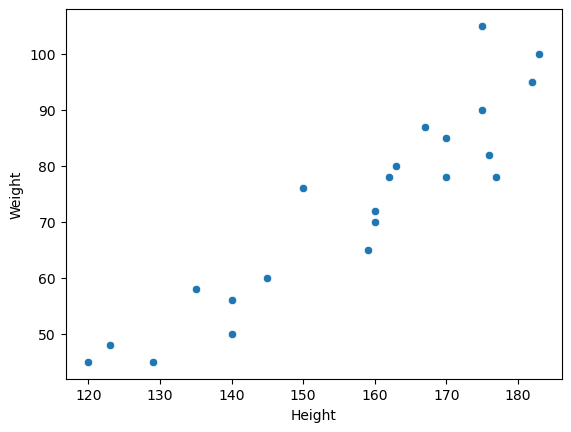

In [7]:
sns.scatterplot(x='Height',y='Weight',data=df)

### Pair plot

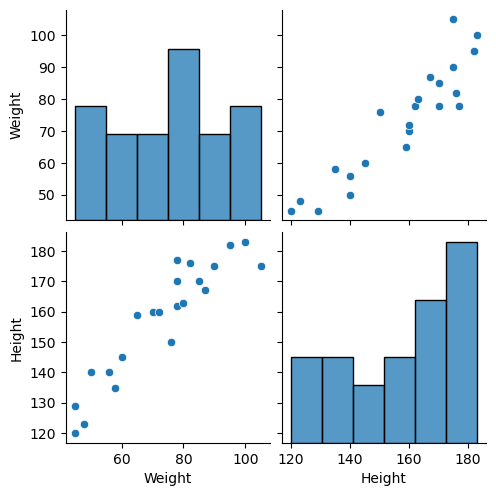

In [8]:
sns.pairplot(df)

<Axes: ylabel='Height'>

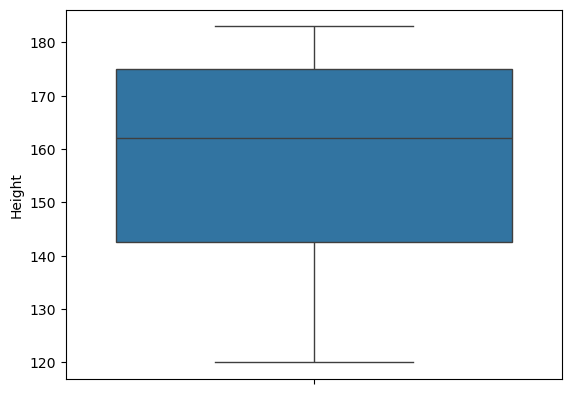

In [9]:
sns.boxplot(df['Height'])

#### separate the input and output features

In [10]:
x=df[['Height']]
y=df['Weight']

### train test split and make lr object

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)


### apply standarization


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [13]:
x_train.mean(),x_train.std()

(1.240837498110469e-16, 1.0)

In [14]:
lr = LinearRegression(n_jobs=-1)

In [15]:
lr.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [16]:
pred=lr.predict(x_test)
pred

array([90.51011585, 84.35910214, 40.42328989, 94.90369708, 74.69322344,
       88.75268336])

### Show regression line


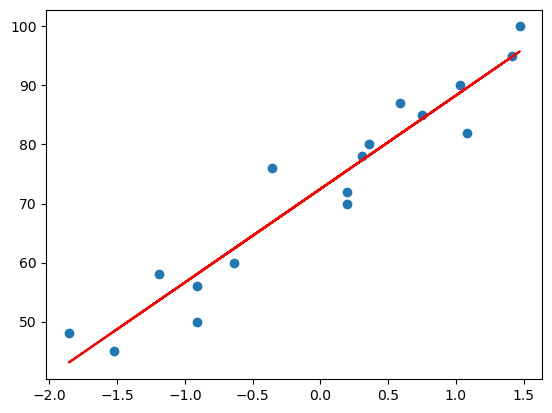

In [17]:
plt.scatter(x_train,y_train)
plt.plot(x_train,lr.predict(x_train),color='red')

### Performance Metrics

In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('MAE:',mean_absolute_error(y_test,pred))
print('MSE:',mean_squared_error(y_test,pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,pred)))
print('R2 Score:',r2_score(y_test,pred))

MAE: 8.247128517477355
MSE: 95.97176782989375
RMSE: 9.796518148296045
R2 Score: 0.7469247259100369


### Coefficients of lr model 




In [19]:
print('Coefficient:',lr.coef_)
print('Intercept:',lr.intercept_)

Coefficient: [15.84018607]
Intercept: 72.47058823529412


### Assumptions

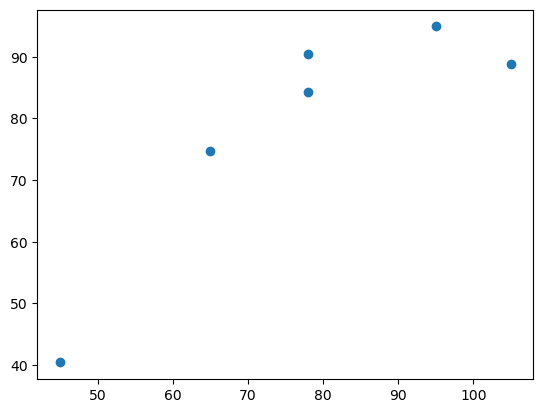

In [20]:
## plot the scatter between y test and y predict
plt.scatter(y_test,pred)

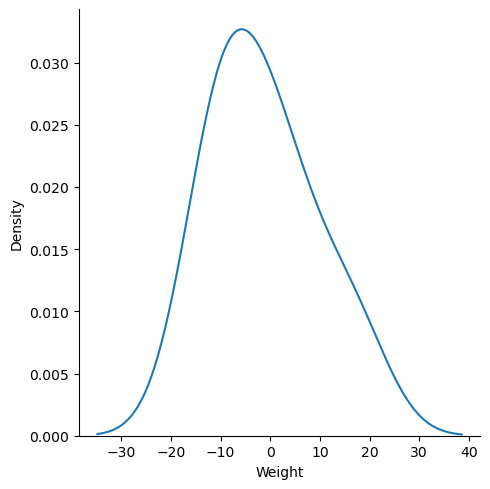

In [21]:
## plot residuals 
residuals = y_test - pred
sns.displot(residuals,kind='kde')

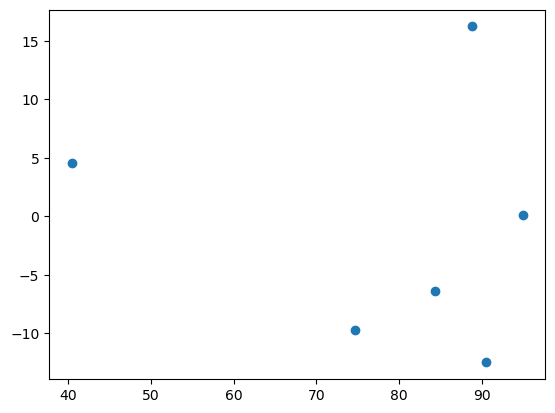

In [22]:
## plot scatter between residuals and y pred
plt.scatter(pred,residuals)

In [47]:
# ols method
import statsmodels.api as sm
x_train_df = pd.DataFrame(x_train, columns=['Height'], index=y_train.index)
ols_lr = sm.OLS(y_train,sm.add_constant(x_train_df)).fit()

In [49]:
predictions = ols_lr.predict(sm.add_constant(pd.DataFrame(x_test, columns=['Height'], index=y_test.index)))

In [51]:
print(predictions)

15    90.510116
9     84.359102
0     40.423290
8     94.903697
17    74.693223
12    88.752683
dtype: float64


In [52]:
print(ols_lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     174.5
Date:                Sat, 30 Aug 2025   Prob (F-statistic):           1.15e-09
Time:                        16:09:51   Log-Likelihood:                -50.229
No. Observations:                  17   AIC:                             104.5
Df Residuals:                      15   BIC:                             106.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.4706      1.199     60.430      0.0

c:\Users\ghula\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)
